In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Health_insurance.csv to Health_insurance.csv


In [3]:
import io
df= pd.read_csv(io.BytesIO(uploaded['Health_insurance.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


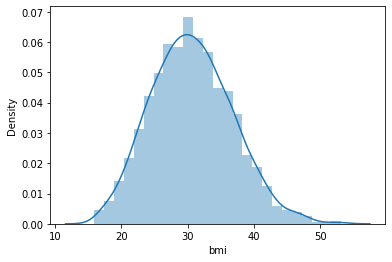

In [27]:
sns.distplot(df.bmi)

data is normally distributed

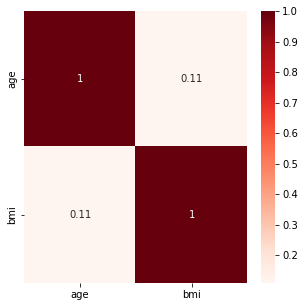

In [6]:
df1 = df[['age', 'bmi']]
plt.figure(figsize=(5,5))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

There is no significant associaton between age and bmi at 5% significant level

**Association between Age and Sex at 5% significance level**

In [16]:
df2 = df[['age', 'sex']]
df2.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [19]:
# Subset data
male = df2.query('sex == "male"')['age']
female = df2.query('sex == "female"')['age']

In [20]:
df2.groupby('sex').describe()

age                                                     
        count       mean        std   min   25%   50%    75%   max
sex                                                               
female  662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0
male    676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0

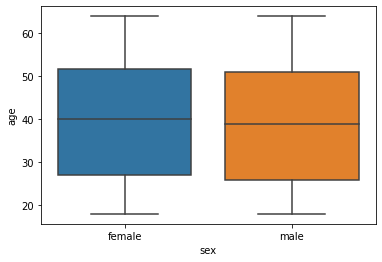

In [21]:
sns.boxplot(x='sex', y='age', data=df)

In [22]:
import scipy.stats as stats
stats.shapiro(male)

ShapiroResult(statistic=0.9438887238502502, pvalue=2.624835460137277e-15)

In [23]:
stats.shapiro(female)

ShapiroResult(statistic=0.9453153014183044, pvalue=6.549280771026879e-15)

In [33]:
age_groups = pd.cut(df2['age'], bins=[18, 26, 34, 42, 50, 58, 66, np.inf])
pd.crosstab(age_groups, df2['sex'])

sex,female,male
age,,
"(18.0, 26.0]",127,138
"(26.0, 34.0]",106,109
"(34.0, 42.0]",101,105
"(42.0, 50.0]",114,113
"(50.0, 58.0]",110,107
"(58.0, 66.0]",71,68


Now we test the association using chi square test of association between the two categorical variables